In [1]:
from pathlib import Path
name = "bayes"
MLFS_ROOT = Path("/data/3d/mlfs") / name
MLFS_ROOT.mkdir(exist_ok=True, parents=True)
(MLFS_ROOT / "flag/post_eval/").mkdir(exist_ok=True, parents=True)
(MLFS_ROOT / "flag/post_infer/").mkdir(exist_ok=True, parents=True)
(MLFS_ROOT / "flag/pre_eval/").mkdir(exist_ok=True, parents=True)
(MLFS_ROOT / "flag/pre_infer/").mkdir(exist_ok=True, parents=True)
(MLFS_ROOT / "post_eval/").mkdir(exist_ok=True, parents=True)
(MLFS_ROOT / "post_infer/").mkdir(exist_ok=True, parents=True)
(MLFS_ROOT / "pre_infer/").mkdir(exist_ok=True, parents=True)

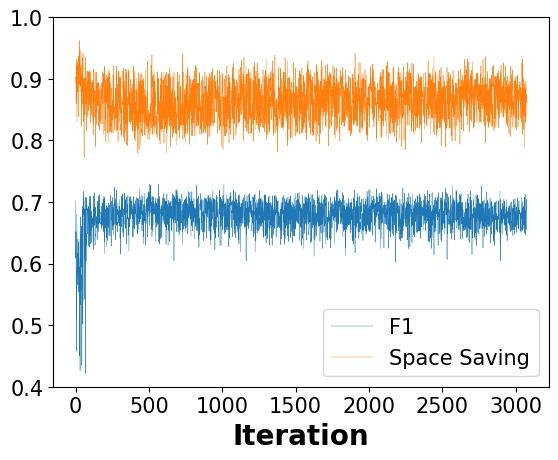

In [13]:
from pathlib import Path
import matplotlib.pyplot as plt
import json

post_eval_dir = Path("/data/3d/mlfs/bayes/post_eval")
f1s = {}
savings = {}
for idx_path in post_eval_dir.glob("*"):
    idx = int(idx_path.name)
    with open(idx_path) as f:
        results = json.load(f)
    f1s[idx] = results['f1']
    savings[idx] = results['saving']

f1s = dict(sorted(f1s.items()))
savings = dict(sorted(savings.items()))

plt.figure()
plt.plot(f1s.keys(), f1s.values(), label="F1", linewidth=0.3)
plt.plot(savings.keys(), savings.values(), label="Space Saving", linewidth=0.3)
plt.legend(fontsize=15)
plt.ylim(0.4, 1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Iteration", fontsize=20, fontweight='bold')
plt.show()
plt.close()

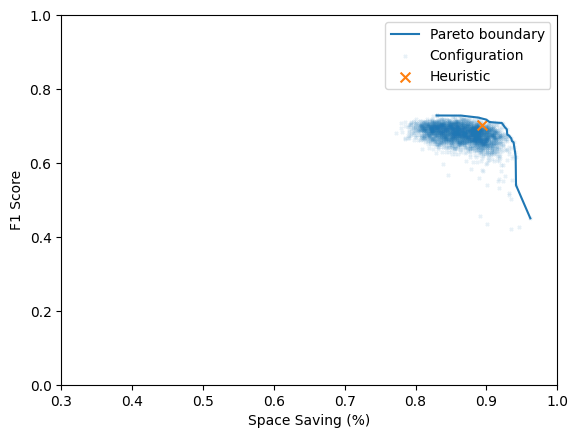

In [26]:
from pathlib import Path
import matplotlib.pyplot as plt
import json

post_eval_dir = Path("/data/3d/mlfs/bayes/post_eval")
f1s = {}
savings = {}
for idx_path in post_eval_dir.glob("*"):
    idx = int(idx_path.name)
    with open(idx_path) as f:
        results = json.load(f)
    f1s[idx] = results['f1']
    savings[idx] = results['saving']
f1s = dict(sorted(f1s.items()))
savings = dict(sorted(savings.items()))

pareto = {}
for idx in f1s.keys():
    if all(f1s[idx] >= f1s[other] or savings[idx] >= savings[other] for other in f1s.keys()):
        pareto[savings[idx]] = f1s[idx]
pareto = dict(sorted(pareto.items()))

plt.figure()
plt.plot(pareto.keys(), pareto.values(), label="Pareto boundary")
plt.scatter(savings.values(), f1s.values(), marker='x', alpha=0.1, s=5, label="Configuration")
plt.scatter(savings[0], f1s[0], marker='x', s=50, label="Heuristic")
plt.xlabel("Space Saving (%)")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xlim(0.3, 1)
plt.legend()
plt.show()
plt.close()